## Part 1: Image processing

In [4]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

In [5]:
coins = data.coins()

In [6]:
coins.shape

(303, 384)

In [7]:
def imgshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # to display the image
    ax.imshow(img, cmap=plt.cm.gray)
    # to avoid displaying the numbers in axis
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

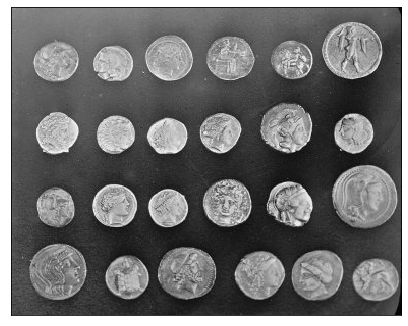

In [8]:
imgshow(coins)

In [9]:
type(coins)

numpy.ndarray

In [10]:
np.max(coins)

252

In [13]:
max_per_column = np.max(coins, axis=0)

In [14]:
len(max_per_column)

384

In [15]:
max_per_row = np.max(coins, axis=1)

In [16]:
len(max_per_row)

303

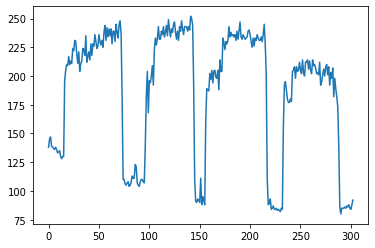

In [17]:
plt.plot(max_per_row)
plt.show()

In [18]:
# binarize the values
umbral = 160
bynary_max_per_row = 255 * (max_per_row > umbral)

In [19]:
bynary_max_per_row

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

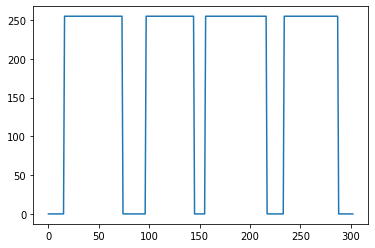

In [20]:
plt.plot(bynary_max_per_row)
plt.show()

In [21]:
test_coins = coins.copy()

In [22]:
test_coins[bynary_max_per_row==0,:] = 255

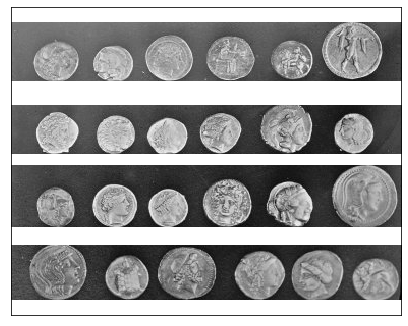

In [23]:
imgshow(test_coins)

Simple method to detect objects aligned horizontally

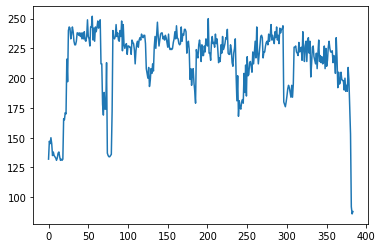

In [24]:
plt.plot(max_per_column)
plt.show()

In [25]:
local_minima = np.array([75, 130, 180, 240, 290])

In [26]:
test_coins[:,local_minima] = 255

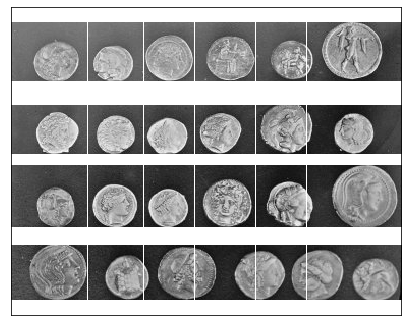

In [27]:
imgshow(test_coins)

Detect objects aligned vertically

## Part 2: Adding and filtering noise

In [28]:
from skimage import data, io, filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
import random

In [29]:
astronaut = data.astronaut()
grayscale = rgb2gray(astronaut)

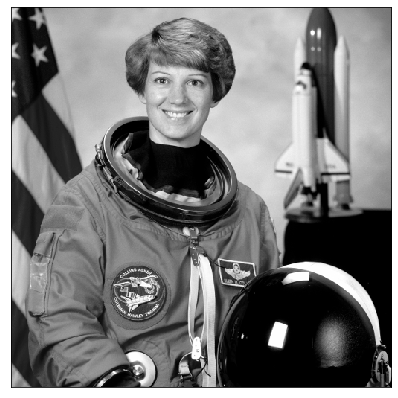

In [30]:
imgshow(grayscale)

In [31]:
grayscale.shape

(512, 512)

In [32]:
# Fuction for adding salt and pepper noise to a given image
# with the given probability
def sp_noise(image,prob):
    output = np.copy(image)
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            rdn = random.random()
            if rdn < prob:
                rdn = random.random()
                if rdn > 0.5:
                    output[i][j] = 0
                else:
                    output[i][j] = 1
    return output

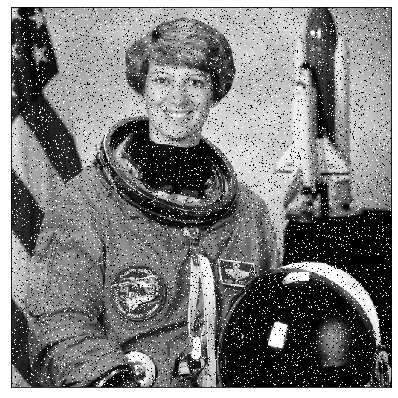

In [33]:
noise = sp_noise(grayscale, 0.1)
imgshow(noise)

In [34]:
# Using the median filter to get the noise out of the image
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((data.shape[0], data.shape[1]))
    for i in range(data.shape[0]):

        for j in range(data.shape[1]):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

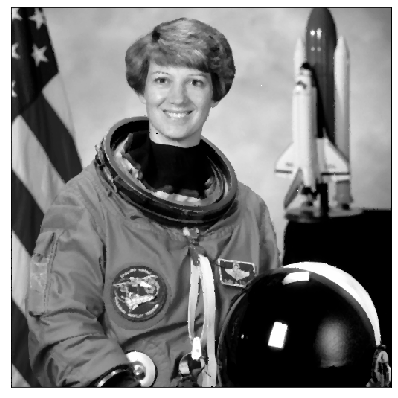

In [35]:
filtro = median_filter(noise, 3)
imgshow(filtro)

## Part 3: Border detection

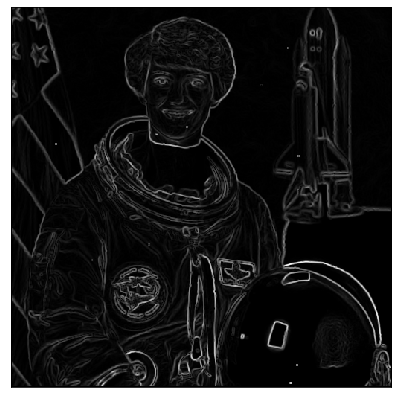

In [36]:
# Prewitts filter
imprewitt = filters.prewitt(filtro)
imgshow(imprewitt)

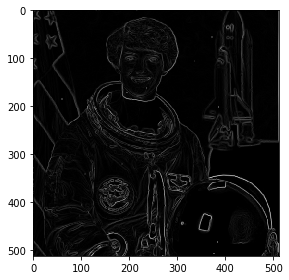

In [37]:
# Sobels filter (very similar as Prewitts)
imsobel = filters.sobel(filtro)
io.imshow(imsobel)
io.show()

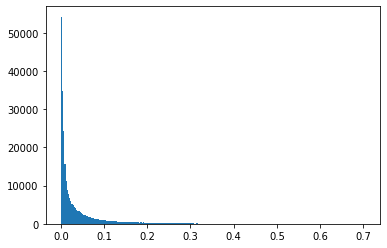

In [39]:
plt.hist(imprewitt.ravel(), bins=256)
plt.show()

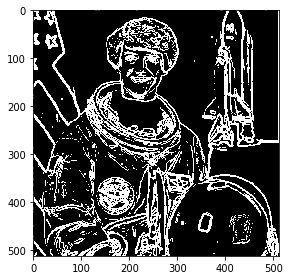

In [40]:
thres = 0.05
binary_custom = imprewitt > thres
io.imshow(binary_custom)
io.show()